# <center>CLASSICAL MACHINE LEARNING<center>

## <center>Cousework 1<center>

## <center>Group 3<center>

### Student Name  and   K-Numbers
- 1. Fanny Namondo Ngomba    K2441388
- 2. Evans Konadu K2436512
- 3. Ashley Daud   K2441726
- 4. Ohemaa Pokuaa Boadu K2447214
    

# 1. Load Modules (code)

In [ ]:
#Installling this library to help create clear results tables
! pip install tabulate

In [ ]:
# Libraries used throughout
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize


from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score,
    confusion_matrix, roc_curve, auc, classification_report
)

# Classifications Models imported
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



# 2. Load Data (code)


In [ ]:
# Loading the dataset (the handwritten digits)
digits = datasets.load_digits(as_frame=True)
X = digits['data']
y = digits['target']

### 2.1.1 UNBALANCED DATASET CHECK

Target label counts:
 target
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64


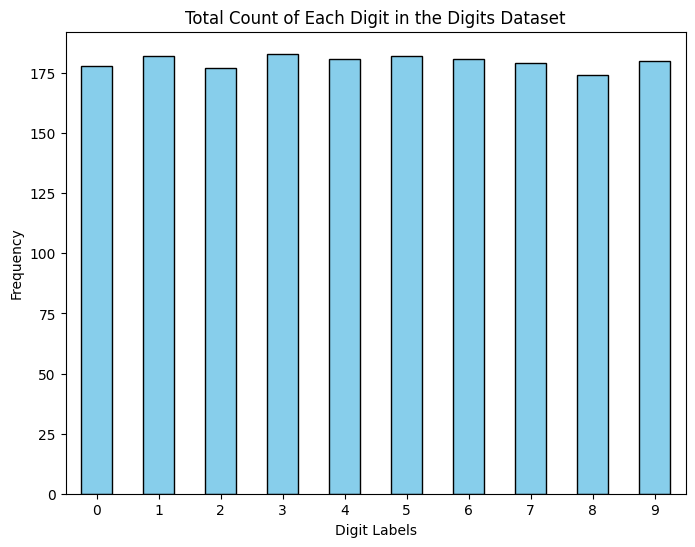

In [ ]:
# Counting the target labels for each digit (0 to 9)
target_counts = y.value_counts().sort_index()
print("Target label counts:\n", target_counts)

# A bar chat showing label counts per target
plt.figure(figsize=(8,6))
target_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Digit Labels")
plt.ylabel("Frequency")
plt.title("Total Count of Each Digit in the Digits Dataset")
plt.xticks(rotation=0)
plt.show()

In [ ]:
imbalance_ratio = target_counts.min() / target_counts.max()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 0.95


**Observation**
- The class distribution shows a minimal imbalance with an imbalance ratio of 0.95, indicating that the classes are nearly equally represented as the ratio is close to 1 .
- The bar graph shows that the dataset is balanced, with a relatively equal number of digits in each class. As a result, there is no need to use the stratify parameter when splitting the data (see appendix 1).





### 2.1.2 DATA SPLIT

In [ ]:
# Splitting the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

# 3. Classification


### Classification Methods Used

1. Logistic Regression [[4]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. Gaussian Naive Bayes [[3]](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
3. Random Forest Classifier [[6]](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
4. K-Nearest Neighbors [[7]](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
5. Decision Tree Classifier [[5]](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
6. Support Vector Classifier [[8]]( https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
7. Gradient Boosting [[9]](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
8. Linear Discriminant Analysis [[17]](https://www.ibm.com/think/topics/linear-discriminant-analysis)







# 4. Training (code)

In [ ]:
# Training the Gaussian Naive Bayes model with default parameters
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Training the Gaussian Naive Bayes model with hyperparameter Tuning
nb_param_grid = {"var_smoothing": np.logspace(-9, 0, 10)}

# Performing a Grid search for Gaussian Naive Bayes
nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, cv=5, scoring="accuracy")
nb_grid_search.fit(X_train, y_train)

#___________________________________________________________________________________________________________

# Training the Logistic Regression model with default parameters
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

# Training the Logistic Regression model with hyperparameter Tuning
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Performing a Grid search for Logistic Regression
lr_grid_search = GridSearchCV(LogisticRegression(max_iter=10000), lr_param_grid,  verbose = 2 ,cv=5, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)

#___________________________________________________________________________________________________________

# Training the Random Forest Classifier model with default parameters **
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)


# Training the Random Forest Classifier model with hyperparameter tuning
rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Performing a Grid search for Random Forest classifier model**
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring="accuracy")
rf_grid_search.fit(X_train, y_train)

#___________________________________________________________________________________________________________

# Training the K- Nearest Neighbour model with default parameters
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Training the K- Nearest Neighbour model with hyperparameter Tuning
knn_param_grid = {
   'n_neighbors': [3, 5, 7, 9],
   'weights': ['uniform', 'distance'],
   'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
   'p': [1, 2]
}

# Performing a Grid search for K- Nearest Neighbour model
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

#___________________________________________________________________________________________________________

# Training the Decision Tree Classifier model with default parameters**
dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train, y_train)


# Training the Decision Tree Classifier model with hyperparameter tuning
dt_param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [3, 5, 10, 20],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2'],
}

# Performing a Grid search for Decision Tree classifier***
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=10,  verbose = 2 ,scoring='accuracy')
dt_grid_search.fit(X_train, y_train)


#___________________________________________________________________________________________________________

# Training the Support Vector Classifer model with default parameters**
svm_model = SVC(kernel='rbf', probability=True, random_state=123)
svm_model.fit(X_train, y_train)

#  Training the Support Vector Classifer model with hyperparameter tuning
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Performing a Grid search for Support Vector Classifer **
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)


#___________________________________________________________________________________________________________

# Training the Gradient Boosting Classifer model with default parameters
gbc = GradientBoostingClassifier(random_state=123)
gbc.fit(X_train, y_train)
default_gbc = gbc.score(X_train, y_train)

# Training the Gradient Boosting Classifer model with hyperparameter tuning
gbc_param_grid = {
    'n_estimators': [120, 130, 8000, 10000, 20000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'subsample': [0.5, 0.6, 0.9],
    'validation_fraction': [0.1],
    'n_iter_no_change': [10]
}

# Performing a Grid search for Gradient Boosting Classifer**
gbc_grid_search = GridSearchCV(gbc, gbc_param_grid, cv=5, n_jobs=-1)
gbc_grid_search.fit(X_train, y_train)

#___________________________________________________________________________________________________________


#  Training the Linear Discriminant Analysis model with default parameters
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

#  Training the Linear Discriminant Analysis model with hyperparameters tuning
lda_param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': ['auto', 0.01, 0.05, 0.1, 0.5],
    'n_components': [None, 5, 10, 15]
}


# Performing a Grid search for  Linear Discriminant Analysis
lda_grid_search = GridSearchCV(lda, lda_param_grid, cv=5, n_jobs=-1)
lda_grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................................C=0.001; total time=   1.3s
[CV] END ............................................C=0.001; total time=   0.8s
[CV] END ............................................C=0.001; total time=   0.9s
[CV] END ............................................C=0.001; total time=   0.8s
[CV] END ............................................C=0.001; total time=   1.6s
[CV] END .............................................C=0.01; total time=   1.9s
[CV] END .............................................C=0.01; total time=   2.4s
[CV] END .............................................C=0.01; total time=   3.0s
[CV] END .............................................C=0.01; total time=   1.8s
[CV] END .............................................C=0.01; total time=   3.8s
[CV] END ..............................................C=0.1; total time=   3.6s
[CV] END ........................................

**Results**
- Using 80% of the data, all models were successfully trained with both default and tuned hyperparameters.

- The Random Forest, Decision Tree, SVM, and Gradient Boosting models have their random_state set to 123 to ensure reproducibility and enable consistent comparison of model performance.



# 5. Evaluation (code)

- **5.1 Evaluating Overfitting : Cross-Validation Scores and Comparison Visualisations**

In [ ]:
# Calculating the cross validation scores : default and tuned per model
nb_default_cv = cross_val_score(nb_model, X_train, y_train, cv=3, n_jobs=-1).mean()
nb_tuned_cv   = cross_val_score(nb_grid_search.best_estimator_, X_train, y_train, cv=3, n_jobs=-1).mean()

lr_default_cv = cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean()
lr_tuned_cv   = cross_val_score(lr_grid_search.best_estimator_, X_train, y_train, cv=5, n_jobs=-1).mean()

rf_default_cv = cross_val_score(rf_model, X_train, y_train, cv=3, n_jobs=-1).mean()
rf_tuned_cv   = cross_val_score(rf_grid_search.best_estimator_, X_train, y_train, cv=3, n_jobs=-1).mean()

knn_default_cv = cross_val_score(knn, X_train, y_train, cv=3, n_jobs=-1).mean()
knn_tuned_cv   = cross_val_score(knn_grid_search.best_estimator_, X_train, y_train, cv=3, n_jobs=-1).mean()

dt_default_cv = cross_val_score(dt, X_train, y_train, cv=5, n_jobs=-1).mean()
dt_tuned_cv   = cross_val_score(dt_grid_search.best_estimator_, X_train, y_train, cv=5, n_jobs=-1).mean()

svm_default_cv = cross_val_score(svm_model, X_train, y_train, cv=5, n_jobs=-1).mean()
svm_tuned_cv   = cross_val_score(svm_grid_search.best_estimator_, X_train, y_train, cv=5, n_jobs=-1).mean()

gbc_default_cv = cross_val_score(gbc, X_train, y_train, cv=3, n_jobs=-1).mean()
gbc_tuned_cv   = gbc_grid_search.best_score_

lda_default_cv = cross_val_score(lda, X_train, y_train, cv=3, n_jobs=-1).mean()
lda_tuned_cv   = lda_grid_search.best_score_


In [ ]:
# Combining all the scores by their models
combined_results = {
    'Gaussian Naive Bayes': {
        'Default': [nb_model.score(X_train, y_train), nb_default_cv, nb_model.score(X_test, y_test)],
        'Tuned':   [nb_grid_search.best_estimator_.score(X_train, y_train), nb_tuned_cv, nb_grid_search.best_estimator_.score(X_test, y_test)]
    },
    'Logistic Regression': {
        'Default': [lr_grid_search.best_estimator_.score(X_train, y_train), lr_default_cv, lr_grid_search.best_estimator_.score(X_test, y_test)],
        'Tuned':   [lr_grid_search.best_estimator_.score(X_train, y_train), lr_tuned_cv, lr_grid_search.best_estimator_.score(X_test, y_test)]
    },
    'Random Forest Classifier': {
        'Default': [rf_model.score(X_train, y_train), rf_default_cv, rf_model.score(X_test, y_test)],
        'Tuned':   [rf_grid_search.best_estimator_.score(X_train, y_train), rf_tuned_cv, rf_grid_search.best_estimator_.score(X_test, y_test)]
    },
    'K-Nearest Neighbors': {
        'Default': [knn.score(X_train, y_train), knn_default_cv, knn.score(X_test, y_test)],
        'Tuned':   [knn_grid_search.best_estimator_.score(X_train, y_train), knn_tuned_cv, knn_grid_search.best_estimator_.score(X_test, y_test)]
    },
    'Decision Tree': {
        'Default': [dt.score(X_train, y_train), dt_default_cv, dt.score(X_test, y_test)],
        'Tuned':   [dt_grid_search.best_estimator_.score(X_train, y_train), dt_tuned_cv, dt_grid_search.best_estimator_.score(X_test, y_test)]
    },
    'Support Vector Classifier': {
        'Default': [svm_model.score(X_train, y_train), svm_default_cv, svm_model.score(X_test, y_test)],
        'Tuned':   [svm_grid_search.best_estimator_.score(X_train, y_train), svm_tuned_cv, svm_grid_search.best_estimator_.score(X_test, y_test)]
    },
    'Gradient Boosting': {
        'Default': [gbc.score(X_train, y_train), gbc_default_cv, gbc.score(X_test, y_test)],
        'Tuned':   [gbc_grid_search.best_estimator_.score(X_train, y_train), gbc_tuned_cv, gbc_grid_search.best_estimator_.score(X_test, y_test)]
    },
    'Linear Discriminant Analysis': {
        'Default': [lda.score(X_train, y_train), lda_default_cv, lda.score(X_test, y_test)],
        'Tuned':   [lda_grid_search.best_estimator_.score(X_train, y_train), lda_tuned_cv, lda_grid_search.best_estimator_.score(X_test, y_test)]
    }
}

# Creating a dataframe containing the train, cv and test score per trained model
index_labels = ['Train', 'CV', 'Test']
df_scores = pd.DataFrame()

# Creating a loop to add the evaluation scores to the dataframe
for model_name, versions in combined_results.items():
    for version, scores in versions.items():
        col_label = f"{model_name} - {version}"
        df_scores[col_label] = scores

# A bar char comparing all the scores per classification model
plt.figure(dpi=200)

df_scores_T = df_scores.transpose()
ax = df_scores_T.plot(kind='bar', figsize=(16, 8))
plt.ylim([0, 1])
plt.ylabel("Accuracy Score")
plt.xlabel("Classification Models")
plt.title("Accuracy Scores For Models: Training, Cross-Validation, and Testing", y = 1.03)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Types of Scores", labels=["Train Score", "CV Score", "Test Score"], bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


**Observation**

- The bar chart compares the train, cross-validation, and test accuracy of each model in both default and tuned models to help in identifying the best-performing model. [[19] ](https://scikit-learn.org/stable/modules/grid_search.html)


 **5.2 Evaluating All Trained Models to Select the Top 8 Performers (Default vs. Tuned) Using Parity Plots**

In [ ]:
# Listing all the classification models to use
models = [
    "Gaussian Naive Bayes",
    "Logistic Regression",
    "Random Forest Classifier",
    "K-Nearest Neighbors",
    "Decision Tree",
    "Support Vector Classifier",
    "Gradient Boosting",
    "Linear Discriminant Analysis"
]

# Extracting all the train & test scores from combined_results above
train_default = []
test_default  = []
train_tuned   = []
test_tuned    = []

for model_name in models:
    train_default.append(combined_results[model_name]['Default'][0])
    test_default.append(combined_results[model_name]['Default'][2])

    train_tuned.append(combined_results[model_name]['Tuned'][0])
    test_tuned.append(combined_results[model_name]['Tuned'][2])

# Calculating the distance of each point from the line of best fit
def distance_from_best_fit_line(train_score, test_score):
    return abs(train_score - test_score) / np.sqrt(2)

# Creating subplots for each model: Default vs Tuned
fig, axes = plt.subplots(8, 2, figsize=(15, 40), dpi=200)

for i in range(len(models)):
    # The subplots for the default models
    axes[i][0].scatter(train_default[i], test_default[i], color='blue',
                       label=f'Default\nTrain: {train_default[i]:.4f}\nTest: {test_default[i]:.4f}', alpha=0.7, s=80)
    distance_default = distance_from_best_fit_line(train_default[i], test_default[i])

    # Adding a dotted line from the best fit line to the plotted point to illustrate the distance in the default models subplot
    axes[i][0].plot([train_default[i], test_default[i]], [test_default[i], test_default[i]], 'b--', alpha=0.5)
    axes[i][0].annotate(f"Dist: {distance_default:.4f}",
                        (train_default[i], test_default[i]), textcoords="offset points",
                        xytext=(10, -10), ha='center', fontsize=8, color='blue')

    # Drawing the line of best fit
    x_vals = np.linspace(0.8, 1.0, 100)
    axes[i][0].plot(x_vals, x_vals, 'r--', label='Line of Best Fit')
    # Layout
    axes[i][0].set_title(f"{models[i]}: Default Model")
    axes[i][0].set_xlabel("Training Accuracy Score")
    axes[i][0].set_ylabel("Test Accuracy Score")
    axes[i][0].set_xlim([0.8, 1.01])
    axes[i][0].set_ylim([0.8, 1.01])
    axes[i][0].legend(loc='upper left')
    axes[i][0].grid(True)

    # The subplots for the optimised models
    axes[i][1].scatter(train_tuned[i], test_tuned[i], color='green',
                       label=f'Tuned\nTrain: {train_tuned[i]:.4f}\nTest: {test_tuned[i]:.4f}', alpha=0.7, s=80)
    distance_tuned = distance_from_best_fit_line(train_tuned[i], test_tuned[i])

    # Adding a dotted line from the best fit line to the plotted point to illustrate the distance in the optimised models subplot
    axes[i][1].plot([train_tuned[i], test_tuned[i]], [test_tuned[i], test_tuned[i]], 'g--', alpha=0.5)
    axes[i][1].annotate(f"Dist: {distance_tuned:.4f}",
                        (train_tuned[i], test_tuned[i]), textcoords="offset points",
                        xytext=(10, -10), ha='center', fontsize=8, color='green')

    # Drawing the line of best fit
    axes[i][1].plot(x_vals, x_vals, 'r--', label='Line of Best Fit')
    # Layout
    axes[i][1].set_title(f"{models[i]}: Tuned Model")
    axes[i][1].set_xlabel("Training Accuracy Score")
    axes[i][1].set_ylabel("Test Accuracy Score")
    axes[i][1].set_xlim([0.8, 1.01])
    axes[i][1].set_ylim([0.8, 1.01])
    axes[i][1].legend(loc='upper left')
    axes[i][1].grid(True)


# Setting out correct titles and layouts for the display
plt.suptitle("Comparison of Model Performance: Default vs. Tuned Hyperparameters", fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

**Results**
- Each subplot compares the different model performances between default and tuned hyper parameters for each model. The point closest to the reference line (line of best fit) indicates the model with the better performance between the two trained versions (default and optimised).

(see appendix 1).

In [ ]:
# A function to calculate the distance from the line of best fit
def distance_from_best_fit_line(train_score, test_score):
    return abs(train_score - test_score) / np.sqrt(2)

# Creating  a dictionary that stores distances from the line of best fit for default and optimised models
model_distances = {
    'Classification Model': models,
    'Default Models Distance': [round(distance_from_best_fit_line(train_default[i], test_default[i]), 4)
                                for i in range(len(models))],
    'Tuned Models Distance': [round(distance_from_best_fit_line(train_tuned[i], test_tuned[i]), 4)
                              for i in range(len(models))]
}

# Creating a list of rows from the dictionary for tabulate
table_data = zip(models,
                 [round(distance_from_best_fit_line(train_default[i], test_default[i]), 4) for i in range(len(models))],
                 [round(distance_from_best_fit_line(train_tuned[i], test_tuned[i]), 4) for i in range(len(models))])

# Defining  the headers for the table
headers = ["Classification Model", "Default Models Distance", "Tuned Models Distance"]

# A title
print (" Distances of Model Performance from the Line of Best Fit")


# Displaying table
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))


# Determine the best models based on the shortest distance from the line of best fit
best_models = []
for i in range(len(models)):
    distance_default = distance_from_best_fit_line(train_default[i], test_default[i])
    distance_tuned = distance_from_best_fit_line(train_tuned[i], test_tuned[i])

    # Select the model with the shortest distance from the line of best fit
    if distance_tuned < distance_default:
        best_models.append((models[i], 'Tuned', distance_tuned))
    else:
        best_models.append((models[i], 'Default', distance_default))

# Print the best models for each classification method
print("Selected Models Based On Distances from Best Fit Line")
for model in best_models:
    print(f"Model: {model[0]}, Best Version: {model[1]}, Distance from Best Fit Line: {model[2]:.4f}")

**Observation**

- The table displays the distance of each point from the various models along the line of best fit, formatted for clearer presentation of the results.
- The selected models Logistic Regression, K-Nearest Neighbors, and Support Vector Classifier perform better with their **default** paramaters.
- The selected models Gaussian Naive Bayes, Random Forest Classifier, Decision Tree, Gradient Boosting, and Linear Discriminant Analysis perform better with their **tuned** paramaters.





**5.3 Classiction Models And Their Optimised Hyperparameters**

In [ ]:
# Selected models and their respective methods
methods = ["Gaussian Naive Bayes", "Logistic Regression", "Random Forest Classifier",
           "K-Nearest Neighbors", "Decision Tree", "Support Vector Classifier",
           "Gradient Boosting", "Linear Discriminant Analysis"]

# Best hyperparameters applied to each model based off the evaluation metrics
best_params = [
    nb_grid_search.best_params_,
    None,
    rf_grid_search.best_params_,
    None,
    dt_grid_search.best_params_,
    None,
    gbc_grid_search.best_params_,
    lda_grid_search.best_params_
]

# Formating the parameters for better readability using line breaks.
def format_hyperparams(params):
    if params is None:
        return 'Default'
    return '\n'.join([f'{k}: {v}' for k, v in params.items()])

# Generating the table data
formatted_params = [format_hyperparams(p) for p in best_params]
table_data = {
    "Classification Method": methods,
    "Optimised Hyperparameters": formatted_params
}

# Printing a table to show the optimised hyperparameters for the different classification methods
print("Optimised Hyperparameters For Different Classification Methods:")
print(tabulate(
    table_data,
    headers='keys',
    tablefmt='fancy_grid',
    stralign='left',
    colalign=('left', 'left')
))

**Observation**

- The table represents the selected models, showing that while some use default parameters, others have received hyperparameter tuning, reflecting varying levels of optimisation across the classification method



In [ ]:
# Initialising an empty lists to store results
results = []

#  A function to add evaluation metrics to a results
def add_result(model_name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    results.append([model_name, report['accuracy'], balanced_acc, report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score']])

# Evaluation of Logistic Regression (Default)
lr_report = lr_model.predict(X_test)
add_result('Logistic Regression', y_test, lr_report)

# Evaluation of Gaussian Naive Bayes
gnb_report = nb_grid_search.predict(X_test)
add_result('Gaussian Naive Bayes', y_test, gnb_report)

# Evaluation of Random Forest Classifier
rf_report = rf_grid_search.predict(X_test)
add_result('Random Forest Classifier', y_test, rf_report)

# Evaluation of K-Nearest Neighbors (Default)
knn_report = knn.predict(X_test)
add_result('K-Nearest Neighbors', y_test, knn_report)

# Evaluation of Decision Tree
dt_report = dt_grid_search.predict(X_test)
add_result('Decision Tree', y_test, dt_report)

# Evaluation of Support Vector Classifier (Default)
svc_report = svm_model.predict(X_test)
add_result('Support Vector Classifier', y_test, svc_report)

# Evaluation of Gradient Boosting
gb_report = gbc_grid_search.predict(X_test)
add_result('Gradient Boosting', y_test, gb_report)

# Evaluation of Linear Discriminant Analysis
lda_report = lda_grid_search.predict(X_test)
add_result('Linear Discriminant Analysis', y_test, lda_report)

# Sorting results in descending order by accuracy
results = sorted(results, key=lambda x: x[1], reverse=True)

# Printing results into a table
headers = ["Model", "Accuracy", "Balanced Accuracy", "Precision", "Recall", "F1-Score"]
title = "Evaluation Metrics of The Top-8 Best Performing Models "
print(title)
print(tabulate(results, headers=headers, tablefmt="fancy_grid"))


**Results**

- The table ranks models from highest to lowest performance based on evaluation metrics.
- The Support Vector Classifier performs the best, achieving a balanced accuracy of 98.92% with strong scores across all metrics.
- The Decision Tree is the lowest-performing model, with a balanced accuracy of 81.93%
.

In [ ]:
# Extracting model names from the results list (first element of each row)
model_names = [result[0] for result in results]
metric_names = headers[1:]  # ["Accuracy", "Balanced Accuracy", "Precision", "Recall", "F1-Score"]

# Picking a colour palette
palette = sns.color_palette("husl", len(model_names))

# Layout and Display
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 24), dpi=200)
fig.suptitle('Performance Metrics of Selected Classification Models', fontsize=20)

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Loop over each metric and create a bar chart for that metric across models
for idx, metric in enumerate(metric_names):
    metric_index = headers.index(metric)
    values = [result[metric_index] for result in results]

    # Sorting the values and corresponding model names
    sorted_values, sorted_model_names = zip(*sorted(zip(values, model_names), reverse=True))

    # Creating a DataFrame for plotting

    data = pd.DataFrame({ 'Model': sorted_model_names,metric: sorted_values})

    # Creating a bar chart for the results
    sns.barplot(ax=axes[idx], x='Model', y=metric, data=data, palette=palette)
    axes[idx].set_xlabel('Models')
    axes[idx].set_ylabel(metric)
    axes[idx].set_title(f'{metric} by Model')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(False)

    # Annotating the points with percentages in 1 decimal place for clarity
    for i, value in enumerate(sorted_values):
        axes[idx].text(i, value + 0.01, f'{value*100:.1f}%', ha='center', va='bottom')

# Hiding any unused subplots
for i in range(len(metric_names), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Observation**

- The bar graph presents the performance of each model across various metrics, arranged from the highest to the lowest performing models.[[11]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)




In [ ]:
# Storing ROC AUC results
roc_auc_results = []

# Creating a function to compute and store ROC AUC scores
def compute_roc_auc(model_name, model, X_test, y_test):
    prob_predictions = model.predict_proba(X_test)  # Get probability predictions

    # Determining if the task is binary or multiclass
    multi_class_option = "ovo" if len(np.unique(y_test)) > 2 else "raise"

    # ROC AUC score with the correct multi_class setting
    score = roc_auc_score(y_test, prob_predictions, multi_class=multi_class_option)
    roc_auc_results.append([model_name, score])

# Listing all models
models = {
    "Logistic Regression": lr_model,
    "Gaussian Naive Bayes": nb_grid_search,
    "Random Forest": rf_grid_search,
    "K-Nearest Neighbors": knn,
    "Decision Tree": dt_grid_search,
    "Support Vector Classifier": svm_model,
    "Gradient Boosting": gbc_grid_search,
    "Linear Discriminant Analysis": lda_grid_search,
}

# Computing ROC AUC for each model seperately
for name, model in models.items():
    compute_roc_auc(name, model, X_test, y_test)

# Sorting results by ROC AUC score in descending order
roc_auc_results.sort(key=lambda x: x[1], reverse=True)

# Displaying results clearly labelled
print("ROC AUC Scores of Selected Classification Models")
print(tabulate(roc_auc_results, headers=["Model", "ROC AUC Score"], tablefmt="fancy_grid"))



**Results**

- Overall, most models demonstrated outstanding performance, with only the Decision Tree model showing a noticeable drop in effectiveness.

In [ ]:
# Converting ROC AUC results to a DataFrame for plotting
roc_auc_df = pd.DataFrame(roc_auc_results, columns=["Model", "ROC AUC Score"])

# Sorting DataFrame by ROC AUC score in descending order
roc_auc_df = roc_auc_df.sort_values(by="ROC AUC Score", ascending=False)

# Defining a color palette
palette = sns.color_palette("viridis", len(roc_auc_df))

# Plotting a bar graph for ROC AUC scores
plt.figure(figsize=(10, 6))
bars = plt.barh(roc_auc_df['Model'], roc_auc_df['ROC AUC Score'], color=palette)
plt.xlabel('ROC AUC Score')
plt.title('ROC AUC Scores for Different Models Arranged From The Highest Scores')
plt.xlim(0.0, 1.0)
plt.gca().invert_yaxis()
plt.grid(False)

# Annotating the bars with score labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f'{width*100:.1f}%', ha='left', va='center')

plt.show()

**Observation**

- The Support Vector Classifier, Random Forest, and Gradient Boosting showed top performance with near-perfect ROC AUC scores, while the Decision Tree lagged behind at 90.9%.






In [ ]:
# Binarising the target labels
y_test_binarized = label_binarize(y_test, classes=range(10))

# Probability predictions for each classifier
lr_y_pred = lr_model.predict_proba(X_test)
nb_y_pred = nb_grid_search.predict_proba(X_test)
rf_y_pred = rf_grid_search.predict_proba(X_test)
knn_y_pred = knn.predict_proba(X_test)
dt_y_pred = dt_grid_search.predict_proba(X_test)
svm_y_pred = svm_model.predict_proba(X_test)
gbc_y_pred = gbc_grid_search.predict_proba(X_test)
lda_y_pred = lda_grid_search.predict_proba(X_test)

# Computing the ROC curves and AUC for each classifier
lr_fpr, lr_tpr, _ = roc_curve(y_test_binarized.ravel(), lr_y_pred.ravel())
lr_auc = auc(lr_fpr, lr_tpr)

nb_fpr, nb_tpr, _ = roc_curve(y_test_binarized.ravel(), nb_y_pred.ravel())
nb_auc = auc(nb_fpr, nb_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test_binarized.ravel(), rf_y_pred.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test_binarized.ravel(), knn_y_pred.ravel())
knn_auc = auc(knn_fpr, knn_tpr)

dt_fpr, dt_tpr, _ = roc_curve(y_test_binarized.ravel(), dt_y_pred.ravel())
dt_auc = auc(dt_fpr, dt_tpr)

svm_fpr, svm_tpr, _ = roc_curve(y_test_binarized.ravel(), svm_y_pred.ravel())
svm_auc = auc(svm_fpr, svm_tpr)

gbc_fpr, gbc_tpr, _ = roc_curve(y_test_binarized.ravel(), gbc_y_pred.ravel())
gbc_auc = auc(gbc_fpr, gbc_tpr)

lda_fpr, lda_tpr, _ = roc_curve(y_test_binarized.ravel(), lda_y_pred.ravel())
lda_auc = auc(lda_fpr, lda_tpr)

# Gathering models and their AUC scores with their unique line styles, colors, and markers (this improves visability).
models_auc = [
    (svm_fpr, svm_tpr, '-', 'blue', 'o', 'SVM', svm_auc),
    (rf_fpr, rf_tpr, '-', 'red', 'x', 'Random Forest', rf_auc),
    (gbc_fpr, gbc_tpr, '-', 'magenta', '+', 'Gradient Boosting', gbc_auc),
    (lr_fpr, lr_tpr, '-', 'green', None, 'Logistic Regression', lr_auc),
    (lda_fpr, lda_tpr, '-', 'cyan', 'x', 'LDA', lda_auc),
    (knn_fpr, knn_tpr, '-', 'orange', 'D', 'K-Nearest Neighbors', knn_auc),
    (nb_fpr, nb_tpr, '-', 'black', 's', 'Gaussian Naive Bayes', nb_auc),
    (dt_fpr, dt_tpr, '-', 'purple', 'v', 'Decision Tree', dt_auc)
]

# Sorting models in descending order
models_auc.sort(key=lambda x: x[6], reverse=True)

# Plotting ROC curves
plt.figure(figsize=(15, 12))
for fpr, tpr, linestyle, color, marker, label, auc_score in models_auc:
    plt.plot(fpr, tpr, linestyle=linestyle, color=color, linewidth=2, alpha=0.8, marker=marker, markersize=5, label=f'{label} (AUC = {auc_score:.3f})')

# Random classifier line (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Reference Line')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve  For Our Top-8 Best Performing Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Observation**

- The ROC AUC curves show the performance of various models, arranged from highest to lowest.[[12]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
- This visual helps compare model effectiveness.

In [ ]:
# Calculating the true positive rates (TPR) from confusion matrices
def true_positive_rate(cm):
    return np.diag(cm) / cm.sum(axis=1)

# Predictions for each model
lr_pred = lr_model.predict(X_test)
nb_pred = nb_grid_search.predict(X_test)
rf_pred = rf_grid_search.predict(X_test)
knn_pred = knn.predict(X_test)
dt_pred = dt_grid_search.predict(X_test)
svm_pred = svm_model.predict(X_test)
gbc_pred = gbc_grid_search.predict(X_test)
lda_pred = lda_grid_search.predict(X_test)

# Calculating confusion matrices for each model
lr_cm = confusion_matrix(y_test, lr_pred)
nb_cm = confusion_matrix(y_test, nb_pred) # Calculate confusion matrix for nb_grid_search
rf_cm = confusion_matrix(y_test, rf_pred) # Calculate confusion matrix for rf_grid_search
knn_cm = confusion_matrix(y_test, knn_pred) # Calculate confusion matrix for knn
dt_cm = confusion_matrix(y_test, dt_pred) # Calculate confusion matrix for dt_grid_search
svm_cm = confusion_matrix(y_test, svm_pred) # Calculate confusion matrix for svm_model
gbc_cm = confusion_matrix(y_test, gbc_pred) # Calculate confusion matrix for gbc_grid_search
lda_cm = confusion_matrix(y_test, lda_pred) # Calculate confusion matrix for lda_grid_search


# Defining confusion matrices for each model
confusion_matrices = {
    "Logistic Regression": lr_cm,
    "Gaussian Naive Bayes": nb_cm,
    "Random Forest": rf_cm,
    "K-Nearest Neighbors": knn_cm,
    "Decision Tree": dt_cm,
    "Support Vector Machine": svm_cm,
    "Gradient Boosting": gbc_cm,
    "Linear Discriminant Analysis": lda_cm
}

# Calculating the average true positive rate for each model
model_tpr = {model: true_positive_rate(cm).mean() for model, cm in confusion_matrices.items()}

# Sorting models by average true positive rate in descending order
sorted_models = sorted(model_tpr.items(), key=lambda x: x[1], reverse=True)

# Creating subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20), dpi=300)
fig.suptitle("Confusion Matrices For Our Top-8 Best Performing Models(%)", fontsize=20)

# Plotting each confusion matrix (percentage)
for ax, (model_name, _) in zip(axes.flatten(), sorted_models):
    cm_perc = confusion_matrices[model_name] / confusion_matrices[model_name].sum(axis=1, keepdims=True) * 100
    sns.heatmap(cm_perc, annot=True, fmt=".1f", cmap="cubehelix", ax=ax, cbar=True)
    ax.set_title(model_name)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

# Layout and Display
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Observation**

- The confusion matrices are ordered by true positive rate, highlighting the best and worst-performing models. [[18]](https://www.datacamp.com/tutorial/what-is-a-confusion-matrix-in-machine-learning) [[20]](https://proclusacademy.com/blog/practical/confusion-matrix-accuracy-sklearn-seaborn/)
- Support Vector Machine and Gradient Boosting show the highest rates, while Gaussian Naive Bayes and Decision Tree have more misclassifications, indicating lower performance (see appendix 1).




# **References**

1. Machine Learning. "Best machine learning books". Available at: Best Machine Learning Books for Beginners & Experts [2023] - InterviewBit (Accessed: 10 February 2025)

2. GitHub. "Recognizing Handwritten Digits by Scikit-Learn." Available at: https://github.com/Abdullahw72/Recognizing-Hand-written-digits-by-scikit-learn/blob/master/Recognizing-Hand-written-digits-by-scikit-learn%20(Suven%20Internship%20P2).ipynb (Accessed: 29 February 2024)


3. Scikit-learn. GaussianNB. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html (Accessed: 15 February 2025)


4. Scikit-learn. LogisticRegression. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html (Accessed: 15 February 2025)


5. Scikit-learn. DecisionTreeClassifier. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html (Accessed: 19 February 2025)


6. Scikit-learn. RandomForestClassifier. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html (Accessed: 17 February 2025)


7. Scikit-learn. KNeighborsClassifier. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html (Accessed: 18 February 2025)


8.  Scikit-learn. SVC. Available at:  https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


9. Scikit-learn, Gradient Boosting, Available at : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html (Accessed: 26 February 2025)


10. PyPI. "Tabulate." Available at: https://pypi.org/project/tabulate/ (Accessed: 26 February 2025)


11. Scikit-learn. "sklearn.metrics.classification_report." Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html (Accessed: 27 February 2025)


12. Scikit-learn. "sklearn.metrics.roc_auc_score." Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html (Accessed: 24 February 2025)



13. Annotate."How to annotate"Available at:.  https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html (Accessed: 28 February 2025)


14. Bobbitt, Z., 2021. How to Plot Line of Best Fit in Python (With Examples). [online] Statology. Available at: https://www.statology.org/line-of-best-fit-python/ (Accessed 22 February 2025).



15. DataCamp."Introduction to plotting with Matplolib in python" Available at : https://www.datacamp.com/tutorial/matplotlib-tutorial-python (Accessed: 23 February 2025)


16. Pandas. "pandas.DataFrame." Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html (Accessed: 29 February 2025)


17. IBM. "What is linear discriminant analysis (LDA)?" Available at: https://www.ibm.com/think/topics/linear-discriminant-analysis (Accessed: 20 February 2025)


18. DataCamp. "What is A Confusion Matrix in Machine Learning?" Available at: https://www.datacamp.com/tutorial/what-is-a-confusion-matrix-in-machine-learning (Accessed: 25 February 2025)

19.  Scikit-learn. GridSearchCV. Available at: https://scikit-learn.org/stable/modules/grid_search.html (Accessed: 21 February 2025)


20. Proclus Academy. "Confusion Matrix and Accuracy with Scikit-Learn and Seaborn." Available at: https://proclusacademy.com/blog/practical/confusion-matrix-accuracy-sklearn-seaborn/ (Accessed: 25 February 2025)



